# Data project - Fishing data for Denmark

Structure of code:
- Dropping of irrelevant areas and renaming from codes to names
- Adding column telling if fish is either industry or consumption
- Calculating relevant statistics for figures
- The development in volume of total catches by regions, 2006-2016 (Figure 1)
- Interactive index figures of catches and seas (Figure 2)
- Pie chart of fish caught in all seas (Figure 3)
- Relative type of fish caught, industry vs. conspumtion, 2016 (Figure 4)

## Data import and removing irrelevant data <a name="paragraph1"></a>

In [28]:
#First we import relevant packages needed to download and open the zipfile, aswell as producing plots later
import zipfile
import urllib.request
import shutil
import pandas as pd
import plotly.graph_objs as go # install plotly: pip install plotly
from plotly.offline import plot
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np


#We specify the url and filename, which we download.
url = 'http://www.ices.dk/marine-data/Documents/CatchStats/OfficialNominalCatches.zip'
zip_name = 'OfficialNominalCatches.zip'

#We "call" the zip-file from the url by using urllib.request and unpack it using extractall()
with urllib.request.urlopen(url) as response, open(zip_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(zip_name) as zf:
        zf.extractall()

BadZipFile: File is not a zip file

In [29]:
#Now we read the .csv-file, which was in the zip we downloaded above
data = pd.read_csv("ICESCatchDataset2006-2016.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#rename columns to avoid having only numbers
yearDict = {}
for i in range(2006, 2017): # range goes from 2006 to but not including 2017
    yearDict[str(i)] = f'y{i}' 

data.rename(columns = yearDict, inplace=True)
data.head()

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Drop columns if all values are NaN
data.dropna(axis="columns", how="all", inplace=True)
data.head()

#Drop if countries is different from Denmark
data = data[data['Country']=='DK']

data.head()

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006
3876,AAS,27.3,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Renaming of fish species and dropping irrelevant species <a name="paragraph2"></a>

In [32]:
#Renaming from species codes to species names
def replaceFish(data, oldname, newname):
    data.loc[data['Species'] == oldname, ['Species']] = newname
    return data

oldname = ['BLL','BOR','CAP','CAT','COD','CSH','DAB','ELE','FLE',
           'HAD','HER','HKE','HOM','LBE','LEM','LIN','LUM','MAC',
           'MON','MUS','NEP','OYF','PLE','POK','POL','PRA','SAL',
           'SAN','SOL','SPR','TRS','TUR','WHB','WHG','WIT']
newname = ['Slethvar','Havgalt','Lodde','Havkat','Torsk','Hestereje',
           'Ising','Blanke/gule ål','Skrubbe','Kuller','Sild','Kulmule',
           'Hestemakrel','Alm. hummer','Rødtunge','Lange','Kulso/stenbider',
           'Makrel','Havtaske','Blåmusling','Dybvandhummer','Østers','Rødspætte',
           'Mørksej','Lyssej','Dybvandsrejer','Laks','Tobis','Tunge','Brisling',
           'Havørred','Pighvar','Blåhvilling','Hvilling','Skærising']
for o,n in zip(oldname,newname):
     data = replaceFish(data, o,n)


#Dropping irrelevant species by counting the length (if =3 then it's an untouched abbreviation) and dropping abbreviations not translated (i.e. not major catch)
data['SpeciesCount']  = data['Species'].apply(len)
data = data.loc[data['SpeciesCount'] != 3]
data = data.drop(['SpeciesCount'], axis=1)

## Dropping of irrelevant areas and renaming from codes to names

In [33]:
data = data.loc[(data['Area'] == '27.4') | (data['Area'] == '27.3.c.22') |(data['Area'] == '27.3.a') | (data['Area'] == '27.3') | (data['Area'] == '27.3.d') | (data['Area'] == '27') ]  

data.loc[data['Area'] == '27.4', ['Area']] = 'North Sea'
data.loc[data['Area'] == '27.3.c.22', ['Area']] = 'Belt Sea'
data.loc[data['Area'] == '27.3', ['Area']] = 'Skagerak, Kattegat, Sound Belt & Baltic Sea'
data.loc[data['Area'] == '27.3.a', ['Area']] = 'Skagerrak & Kattegat'
data.loc[data['Area'] == '27.3.b', ['Area']] = 'Sound'
data.loc[data['Area'] == '27.3.d', ['Area']] = 'Baltic Sea'
data.loc[data['Area'] == '27', ['Area']] = 'All seas'


## Adding column telling if fish is either industry or consumption

Commercially caught fish can generally be labeled as a consumption or an industry fish. Consumption fish are species that are sold for human consumption. Well known consumption species are slamon, cod and tuna. Industry fish are generally sold to fish factories, who process the fish and turn them into fishmeal and fish oil. Fishmeal is mostly used to feed livestock, while fish oil has several uses. 
Whether a species is a consumtion or industry fish is not universially defined, as local cousine culture can vary. E.g.,
in Germany, sprat (brisling in danish) is often sold for human consumption, while it is not in Denmark. Our categorization is based on the Danish definitions, given by the danish Fishing Administration (Fiskeristyrelsen). 
Futhermore, EU regulations forbid sale of fish for human consumption if the fish is below a minimum length. E.g. a typical consumption fish like the cod, may not be sold for human consumption if it is below 32 centimeters in length (The minimum length can vary based on the water in which the fish is caught). Generally, the ammount of fish below the minimum lenght is less than 5 pct. and we will not take this into account.

In [34]:
#Adding column with type of fish (industry og consumption) based on Species column
def set_type(fish):
    if fish["Species"] == "Tobis":
        return "Industry"
    elif fish["Species"] == "Brisling":
        return "Industry"
    elif fish["Species"] == "Blåhvilling":
        return "Industry"
    elif fish["Species"] == "Hestemakrel":
        return "Industry"
    elif fish["Species"] == "Skolæst":
        return "Industry"
    elif fish["Species"] == "Havgalt":
        return "Industry"
    elif fish["Species"] == "Sperling":
        return "Industry"
    else:
        return "Consumption"

data = data.assign(Type=data.apply(set_type, axis=1))

# Calculating relevant statistics for figures

In [35]:
# Calculating total catches in each water for figures
Total_All=data[data['Area']=='All seas'].sum()['y2016']
Total_North_Sea=data[data['Area']=='North Sea'].sum()['y2016']
Total_Belt_Sea=data[data['Area']=='Belt Sea'].sum()['y2016']
Total_Baltic_Sea=data[data['Area']=='Baltic Sea'].sum()['y2016']
Total_Skagerrak_Kattegat=data[data['Area']=='Skagerrak & Kattegat'].sum()['y2016']
Total_Sound=data[data['Area']=='Skagerak, Kattegat, Sound Belt & Baltic Sea'].sum()['y2016']-Total_Skagerrak_Kattegat-Total_Baltic_Sea
Total_Test=Total_Sound+Total_Skagerrak_Kattegat+Total_Baltic_Sea+Total_Belt_Sea+Total_North_Sea
Total_Unknown=Total_All-Total_Test

# We find the amount of consumption and industry fishes caught in each water
Total_All_I=data[(data['Area']=='All seas')&(data['Type']=='Industry')].sum()['y2016']
Total_All_C=data[(data['Area']=='All seas')&(data['Type']=='Consumption')].sum()['y2016']

Total_North_Sea_I=data[(data['Area']=='North Sea')&(data['Type']=='Industry')].sum()['y2016']
Total_North_Sea_C=data[(data['Area']=='North Sea')&(data['Type']=='Consumption')].sum()['y2016']

Total_Belt_Sea_I=data[(data['Area']=='Belt Sea')&(data['Type']=='Industry')].sum()['y2016']
Total_Belt_Sea_C=data[(data['Area']=='Belt Sea')&(data['Type']=='Consumption')].sum()['y2016']

Total_Baltic_Sea_I=data[(data['Area']=='Baltic Sea')&(data['Type']=='Industry')].sum()['y2016']
Total_Baltic_Sea_C=data[(data['Area']=='Baltic Sea')&(data['Type']=='Consumption')].sum()['y2016']

Total_SandK_Sea_I=data[(data['Area']=='Skagerrak & Kattegat')&(data['Type']=='Industry')].sum()['y2016']
Total_SandK_Sea_C=data[(data['Area']=='Skagerrak & Kattegat')&(data['Type']=='Consumption')].sum()['y2016']

Total_Sound_I=data[(data['Area']=='Skagerak, Kattegat, Sound Belt & Baltic Sea')&(data['Type']=='Industry')].sum()['y2016']-Total_SandK_Sea_I-Total_Baltic_Sea_I
Total_Sound_C=data[(data['Area']=='Skagerak, Kattegat, Sound Belt & Baltic Sea')&(data['Type']=='Consumption')].sum()['y2016']-Total_SandK_Sea_C-Total_Baltic_Sea_C

#We find the relative amount of industry and consumption fish caught in each water
Relative_I_All=Total_All_I/Total_All
Relative_C_All=Total_All_C/Total_All

Relative_I_North_Sea=Total_North_Sea_I/Total_North_Sea
Relative_C_North_Sea=Total_North_Sea_C/Total_North_Sea

Relative_I_Belt_Sea=Total_Belt_Sea_I/Total_Belt_Sea
Relative_C_Belt_Sea=Total_Belt_Sea_C/Total_Belt_Sea

Relative_I_Baltic_Sea=Total_Baltic_Sea_I/Total_Baltic_Sea
Relative_C_Baltic_Sea=Total_Baltic_Sea_C/Total_Baltic_Sea

Relative_I_SandK_Sea=Total_SandK_Sea_I/Total_Skagerrak_Kattegat
Relative_C_SandK_Sea=Total_SandK_Sea_C/Total_Skagerrak_Kattegat

Relative_I_Sound_Sea=Total_Sound_I/Total_Sound
Relative_C_Sound_Sea=Total_Sound_C/Total_Sound


# The development in volume of total catches by regions, 2006-2016 

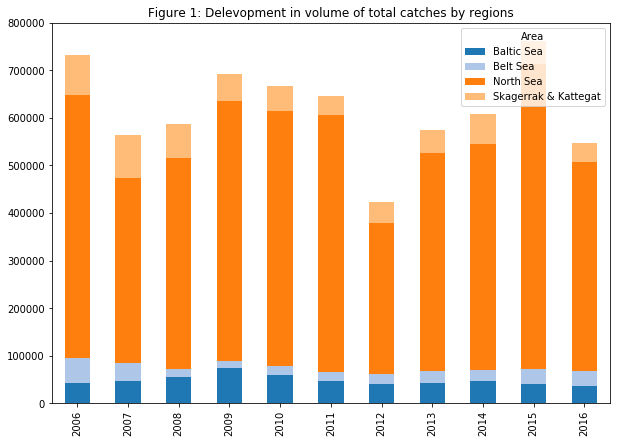

In [48]:
#First we groupby.sum (equivalent to collapse (sum) in stata by Area(=Sea))
datasum = data.groupby(['Area'])['y2016','y2015','y2014','y2013','y2012','y2011','y2010','y2009','y2008','y2007','y2006'].sum()
#We drop the aggregated category 'All seas'
datasum = datasum.drop(['All seas'])
#We transpose the dataset for easier creation of stacked bar plot, reverse the order and remove "y" from years
datasumt = datasum.transpose()
datasumt = datasumt[::-1]

datasumt.index = np.arange(2006, len(datasumt) + 2006)

#Define colors and generate figure
color = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78",
          "#2ca02c", "#98df8a", "#d62728", "#ff9896",
         "#9467bd", "#c5b0d5", "#7f7f7f"]
datasumt.loc[:,['Baltic Sea','Belt Sea','North Sea', 'Skagerrak & Kattegat']].plot.bar(stacked=True, title='Figure 1: Delevopment in volume of total catches by regions', color=color,figsize=(10,7))


Figure 1 shows that the North Sea is by far has the largest share of total TLW catches across the years. From 2006 to 2016 we see no clear trend in the evolution of total TLW catches. 

# Interactive index figures of catches and seas

In [52]:
#First we copy the observations of "All Seas" to a new dataframe to work with aswell as drop irrelevant columns
dataindex = data.loc[data['Area'] == 'All seas'] 
dataindex = dataindex.drop(['Area'], axis=1)
dataindex = dataindex.drop(['Country'], axis=1)
dataindex = dataindex.drop(['Units'], axis=1)
dataindex = dataindex.drop(['Type'], axis=1)

#Drop Lodde and Havgalt because of irregular catch schedules (goes from 0 to 10000-ish between years)
dataindex = dataindex.loc[dataindex['Species'] != 'Lodde']
dataindex = dataindex.loc[dataindex['Species'] != 'Havgalt']

#Reindex Species
dataindex.set_index('Species', inplace=True)
dataindex = dataindex.iloc[:, ::-1]

#Sum to find 10 largest catches by volume across the years (2006-2016)
dataindex['sum'] = dataindex.sum(axis=1)
largest = dataindex.nlargest(10, ['sum']) 
largest = largest.drop(['sum'], axis=1)

#Normalize 10 largest catches to base year 2006, 2006=100
for x in ('y2016','y2015','y2014','y2013','y2012','y2011','y2010','y2009','y2008','y2007','y2006'):
    largest[x] = largest[x]*100/largest['y2006']

#Remove "y" in column names for prettier figure
largest.columns = largest.columns.str.replace('y', '')

#Making interactive index plot of 10 largest catches in all oceans (Opens on a new page)
datafig = [go.Scatter(x=largest.columns,
                   y=largest.loc[Species],
                   name=Species) for Species in largest.index]
layout = go.Layout(
    title='Figure 2: Normalization of catches by species for 10 largest catches, all seas',
    yaxis=dict(title='2006=100'),
    xaxis=dict(title='Years')
)

fig = go.Figure(data=datafig, layout=layout)
plot(fig)


'temp-plot.html'

The plot created above shows plots of indexes of the 10 largest catches across all seas. The largest catches are chosen by summing the total volume, by catch, over the 10 years of data. 

As can be seen in the chart no catch shows any specific trends and are highly volatile across years. This is likely due to the volatility in the value of the catches (the current auction price). E.g. we can see that Blåhvilling goes to (almost) index=0 at 2009 untill 2012, where it climbs again, but doesn't reach the initial point. The catch, which shows the most stable growth path is perhaps the Makrel or Rødspætte, which are both consumption fishes and not for industry-use.

We can see that nearly all of the fishes suffers some setback in the amount of catches in 2007 and 2008, which might be due to the financial crisis. 

# Pie chart of fish caught in all seas

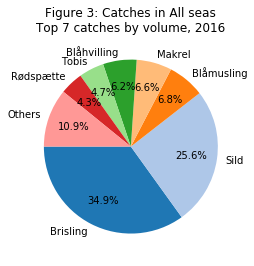

In [50]:
# Copy of data that only includes the area All seas
all_seas = data.copy()
all_seas = all_seas.loc[all_seas['Area'] == 'All seas',:]
all_seas.head()

# Sorted by largest amount caught in 2016
all_seas = all_seas.sort_values(by = ['y2016'], ascending=False)

# Top 7 is extracted
top7 = all_seas[:7].copy()

# The remaining species are renamed 'Others' and aggregated
others = pd.DataFrame(data = {
    'Species' : ['Others'],
    'y2016' : [all_seas['y2016'][7:].sum()]
})

# Combining Top 7 and Others
full = pd.concat([top7, others], sort=False)

# Plot showing the share of fish caught in 2016 by species
amount_2016 = full['y2016']
species_data = full['Species']

colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78",
          "#2ca02c", "#98df8a", "#d62728", "#ff9896",
         "#9467bd", "#c5b0d5", "#7f7f7f"]

plt.pie(amount_2016, labels=species_data, explode=None, colors=colors,
autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=False, startangle=180)

plt.title("Figure 3: Catches in All seas\n"+"Top 7 catches by volume, 2016")

plt.show()

Figure 3 illustrates the shares of fish caught in 2016 by species in 'All seas'. It shows the top 7 most caught species of fish and 'Others', which is an aggregation of the rest of the species. From the chart we notice that the two largest shares of fish caugt in 2016, Brisling (34.4 pct.) and Sild (25.6 pct.), constitute around 60 pct. of the total amount caught in Danish seas. Blåhvilling, Makrel and Blåmusling each make up around 6-7 pct. of the total catches, and Tobis and Rødspætte each make up 4-5 pct., hence a much smaller share than Brisling and Sild. The aggregated 'Others', which includes the remaining 28 species, constitutes 10.9 pct. of the total amount of fish caught in 2016.

# Relative type of fish caught, industry vs. conspumtion, 2016

We make a dataplot of the relative catches by type

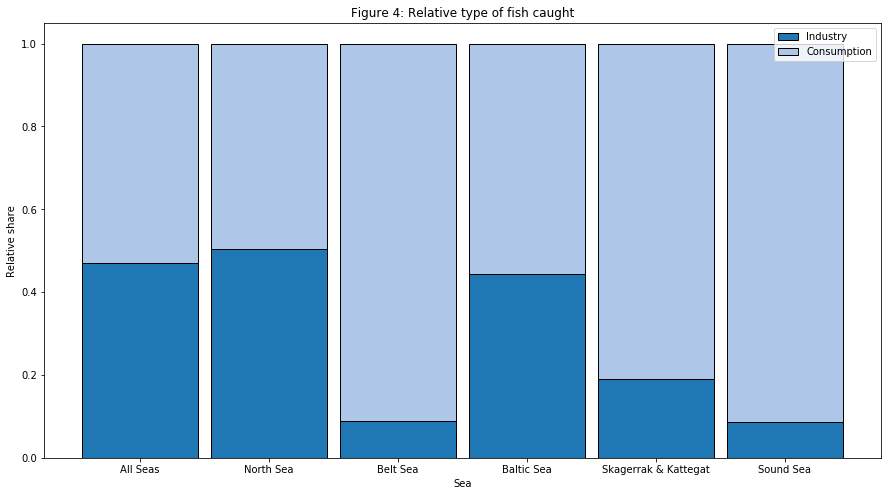

In [51]:
#Making dataplot of relative catches
Industry_Seas=(Relative_I_All, Relative_I_North_Sea, Relative_I_Belt_Sea, Relative_I_Baltic_Sea, Relative_I_SandK_Sea, Relative_I_Sound_Sea)
Consumption_Seas=(Relative_C_All, Relative_C_North_Sea, Relative_C_Belt_Sea, Relative_C_Baltic_Sea, Relative_C_SandK_Sea, Relative_C_Sound_Sea)

N=6
ind = np.arange(N)

plt.figure(figsize=(15,8))
p1 = plt.bar(ind, Industry_Seas, width=0.9, color='#1f77b4' ,edgecolor='black')
p2 = plt.bar(ind, Consumption_Seas, width=0.9, color='#aec7e8',
             bottom=Industry_Seas, edgecolor='black')

plt.ylabel('Relative share')
plt.xlabel('Sea')
plt.title('Figure 4: Relative type of fish caught')
plt.xticks(ind,('All Seas','North Sea','Belt Sea','Baltic Sea','Skagerrak & Kattegat', 'Sound Sea'))
plt.legend(['Industry','Consumption'])

plt.show(p1,p2)

As can be seen in Figure 4 there is a huge difference in the amount of industry-related fishing caught relative to consumption-related fishing across the seas. Belt Sea and Sound Sea shows little industry (Torsk and Rødspætte are catched here), while the North Sea (Primarily Brisling, Sild and Tobis are caught here) shows the largest.